In [1]:
from libraries import *
from parameters import *
import anndata as ad

In [2]:
%load_ext rpy2.ipython

In [3]:
os.getcwd()
os.chdir(projectDir)

In [ ]:
# adataLPSMinus = sc.read_10x_h5('./data/data_unperturbed/LPSMinus_v3_raw_feature_bc_matrix.h5').copy()
# adataLPSPlus = sc.read_10x_h5('./data/data_unperturbed/LPSPlus_v3_raw_feature_bc_matrix.h5').copy()
# adataLPSMinus.var_names_make_unique()
# adataLPSPlus.var_names_make_unique()


# sc.pp.filter_cells(adataLPSMinus, min_genes=800)
# sc.pp.filter_genes(adataLPSMinus, min_cells=10)
# sc.pp.filter_cells(adataLPSPlus, min_genes=800)
# sc.pp.filter_genes(adataLPSPlus, min_cells=10)


# adataLPSMinus.var['mt'] = adataLPSMinus.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
# sc.pp.calculate_qc_metrics(adataLPSMinus, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
# adataLPSPlus.var['mt'] = adataLPSPlus.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
# sc.pp.calculate_qc_metrics(adataLPSPlus, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


# sc.pl.violin(adataLPSMinus, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
#              jitter=0.4, multi_panel=True)

# sc.pl.violin(adataLPSPlus, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
#              jitter=0.4, multi_panel=True)


# # sc.pl.scatter(adataLPSPlus, x='total_counts', y='pct_counts_mt')
# # sc.pl.scatter(adataLPSPlus, x='total_counts', y='n_genes_by_counts')
# # sc.pl.scatter(adataLPSMinus, x='total_counts', y='pct_counts_mt')
# # sc.pl.scatter(adataLPSMinus, x='total_counts', y='n_genes_by_counts')


# adataLPSPlus = adataLPSPlus[adataLPSPlus.obs.n_genes_by_counts < 2500, :]
# adataLPSPlus = adataLPSPlus[adataLPSPlus.obs.pct_counts_mt < 10, :]
# adataLPSMinus = adataLPSMinus[adataLPSMinus.obs.n_genes_by_counts < 2500, :]
# adataLPSMinus = adataLPSMinus[adataLPSMinus.obs.pct_counts_mt < 10, :]


# adataLPSPlus.obs["type"] = "LPSPlus"
# adataLPSMinus.obs["type"] = "LPSMinus"


# adataAll = ad.concat([adataLPSMinus, adataLPSPlus], join="outer")
# #adataAll.var_names_make_unique()
# adataAll.obs_names_make_unique()

# sc.pp.normalize_total(adataAll, target_sum=1e4)
# sc.pp.log1p(adataAll)
# adataAll.raw = adataAll


# gene_list_url = 'https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt'

# cell_cycle_genes = [str(x.strip(), 'utf-8').capitalize() for x in urlopen(gene_list_url)] # capitalize = shame


# s_genes = cell_cycle_genes[:43]
# g2m_genes = cell_cycle_genes[43:]


# sc.tl.score_genes_cell_cycle(adataAll, s_genes=s_genes, g2m_genes=g2m_genes)


# sc.pp.highly_variable_genes(adataAll, n_top_genes = 2000)
# sc.pp.regress_out(adataAll, ['total_counts', 'pct_counts_mt'])
# sc.pp.scale(adataAll, max_value=10)
# sc.tl.pca(adataAll, svd_solver='arpack')
# sc.pp.neighbors(adataAll, n_neighbors=10, n_pcs=50)

# sc.tl.umap(adataAll, min_dist=0.4, init_pos="spectral")

# sc.tl.leiden(adataAll, resolution=0.5)

# sc.tl.diffmap(adataAll)
# sc.tl.rank_genes_groups(adataAll, groupby="leiden", n_genes=2000, method="t-test_overestim_var")


#adataAll.write("outputs/anndata/adataLPSPlusMinus.h5ad")

In [4]:
adata = sc.read('outputs/anndata/adata-hash-features_singlets_SingleKO_06292020_PerGENE.h5ad')

In [5]:
adataAll = sc.read("outputs/anndata/adataLPSPlusMinus.h5ad")

In [6]:
dcGenes = pd.read_csv('./PositiveControls/DC_cellstate_genes.csv')
dc1Genes = dcGenes["DC1 genes"].unique()
dc2Genes = dcGenes["DC2 genes"].unique()
mregGenes = dcGenes["mregDC genes"].unique()
macGenes = dcGenes["Macrophage genes"].unique()

leidenMarkersOfPerturbedCells = pd.read_csv("./TextFiles/Leiden_top100Markers.csv")
leidenMarkersOfPerturbedCells = leidenMarkersOfPerturbedCells.groupby('group').head(50)



In [7]:
sc.tl.score_genes(adata=adata, gene_list=dc1Genes, score_name="DC1")
sc.tl.score_genes(adata=adata, gene_list=dc2Genes, score_name="DC2")
sc.tl.score_genes(adata=adata, gene_list=mregGenes, score_name="mreg")
sc.tl.score_genes(adata=adata, gene_list=macGenes, score_name="Mac")


sc.tl.score_genes(adata=adataAll, gene_list=dc1Genes, score_name="DC1")
sc.tl.score_genes(adata=adataAll, gene_list=dc2Genes, score_name="DC2")
sc.tl.score_genes(adata=adataAll, gene_list=mregGenes, score_name="mreg")
sc.tl.score_genes(adata=adataAll, gene_list=macGenes, score_name="Mac")

computing score 'DC1'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'DC1', score of gene set (adata.obs).
    1184 total control genes are used. (0:00:09)
computing score 'DC2'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'DC2', score of gene set (adata.obs).
    1176 total control genes are used. (0:00:09)
computing score 'mreg'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'mreg', score of gene set (adata.obs).
    1152 total control genes are used. (0:00:09)
computing score 'Mac'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'Mac', score of gene set (adata.obs).
    1127 total control genes are used. (0:00:09)
computing score 'DC1'
    finished: added
    'DC1', score of gene set (adata.obs).
    1171 total control genes are used. (0:00:00)
computing score 'DC2'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'DC2', score of gene set (adata.obs).
    1161 total control genes are used. (0:00:00)
computing score 'mreg'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'mreg', score of gene set (adata.obs).
    1134 total control genes are used. (0:00:00)
computing score 'Mac'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'Mac', score of gene set (adata.obs).
    1162 total control genes are used. (0:00:00)


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [8]:
adata.obs["subCellType"] = "DC2"
adata.obs.loc[adata.obs.leiden.isin(['3']), "subCellType"] = "MacDC"
adata.obs.loc[adata.obs.leiden.isin(['8']), "subCellType"] = "DC1"
adata.obs.loc[adata.obs.leiden.isin(['5']), "subCellType"] = "MReg"

In [9]:
for i in leidenMarkersOfPerturbedCells.group.unique():
     myGeneList = leidenMarkersOfPerturbedCells.loc[leidenMarkersOfPerturbedCells.group == i,'names']
     myGeneList = [x.replace(".","-") for x in myGeneList]
     sc.tl.score_genes(adata=adataAll, gene_list=myGeneList, score_name="TC_"+str(i) + "_scores")
     sc.tl.score_genes(adata=adata, gene_list=myGeneList, score_name="TC_"+str(i) + "_scores")


computing score 'TC_0_scores'
    finished: added
    'TC_0_scores', score of gene set (adata.obs).
    396 total control genes are used. (0:00:00)
computing score 'TC_0_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_0_scores', score of gene set (adata.obs).
    255 total control genes are used. (0:00:08)
computing score 'TC_1_scores'
    finished: added
    'TC_1_scores', score of gene set (adata.obs).
    742 total control genes are used. (0:00:00)
computing score 'TC_1_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_1_scores', score of gene set (adata.obs).
    407 total control genes are used. (0:00:08)
computing score 'TC_2_scores'
    finished: added
    'TC_2_scores', score of gene set (adata.obs).
    343 total control genes are used. (0:00:00)
computing score 'TC_2_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_2_scores', score of gene set (adata.obs).
    395 total control genes are used. (0:00:08)
computing score 'TC_3_scores'
    finished: added
    'TC_3_scores', score of gene set (adata.obs).
    845 total control genes are used. (0:00:00)
computing score 'TC_3_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_3_scores', score of gene set (adata.obs).
    548 total control genes are used. (0:00:08)
computing score 'TC_4_scores'
    finished: added
    'TC_4_scores', score of gene set (adata.obs).
    796 total control genes are used. (0:00:00)
computing score 'TC_4_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_4_scores', score of gene set (adata.obs).
    645 total control genes are used. (0:00:08)
computing score 'TC_5_scores'
    finished: added
    'TC_5_scores', score of gene set (adata.obs).
    394 total control genes are used. (0:00:00)
computing score 'TC_5_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_5_scores', score of gene set (adata.obs).
    658 total control genes are used. (0:00:08)
computing score 'TC_6_scores'
    finished: added
    'TC_6_scores', score of gene set (adata.obs).
    745 total control genes are used. (0:00:00)
computing score 'TC_6_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_6_scores', score of gene set (adata.obs).
    793 total control genes are used. (0:00:08)
computing score 'TC_7_scores'
    finished: added
    'TC_7_scores', score of gene set (adata.obs).
    546 total control genes are used. (0:00:00)
computing score 'TC_7_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_7_scores', score of gene set (adata.obs).
    648 total control genes are used. (0:00:08)
computing score 'TC_8_scores'
    finished: added
    'TC_8_scores', score of gene set (adata.obs).
    341 total control genes are used. (0:00:00)
computing score 'TC_8_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_8_scores', score of gene set (adata.obs).
    408 total control genes are used. (0:00:08)
computing score 'TC_9_scores'
    finished: added
    'TC_9_scores', score of gene set (adata.obs).
    795 total control genes are used. (0:00:00)
computing score 'TC_9_scores'


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'TC_9_scores', score of gene set (adata.obs).
    798 total control genes are used. (0:00:08)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
X_train = adata.obs[["DC1", "DC2", "mreg", "Mac"]]
y_train = adata.obs["subCellType"]

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

clf = LogisticRegression(random_state=0).fit(X_scaled, y_train)

X_test = adataAll.obs[["DC1", "DC2", "mreg", "Mac"]]
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler.transform(X_test)

adataAll.obs["Pred_subCellType"] = clf.predict(X_scaled_test)

In [11]:
X_train = adata.obs[["TC_0_scores", "TC_1_scores", "TC_2_scores", "TC_3_scores",
                    "TC_4_scores", "TC_5_scores", "TC_6_scores", "TC_7_scores",
                    "TC_8_scores", "TC_9_scores"]]
y_train = adata.obs["leiden"]

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

clf = LogisticRegression(random_state=0).fit(X_scaled, y_train)

X_test = adataAll.obs[["TC_0_scores", "TC_1_scores", "TC_2_scores", "TC_3_scores",
                    "TC_4_scores", "TC_5_scores", "TC_6_scores", "TC_7_scores",
                    "TC_8_scores", "TC_9_scores"]]
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler.transform(X_test)

adataAll.obs["Pred_TC"] = clf.predict(X_scaled_test)

/home/eraslab1/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


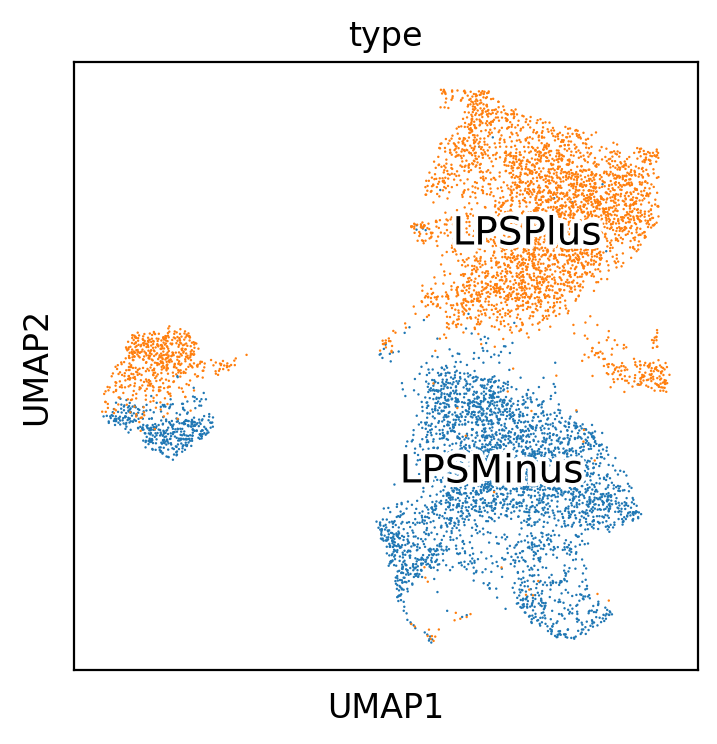

In [12]:
sc.pl.umap(adataAll, color='type', color_map="coolwarm", 
           legend_loc='on data', legend_fontoutline=3, 
           legend_fontsize=14, legend_fontweight='normal', size=3, save="Figure_S1H.pdf");

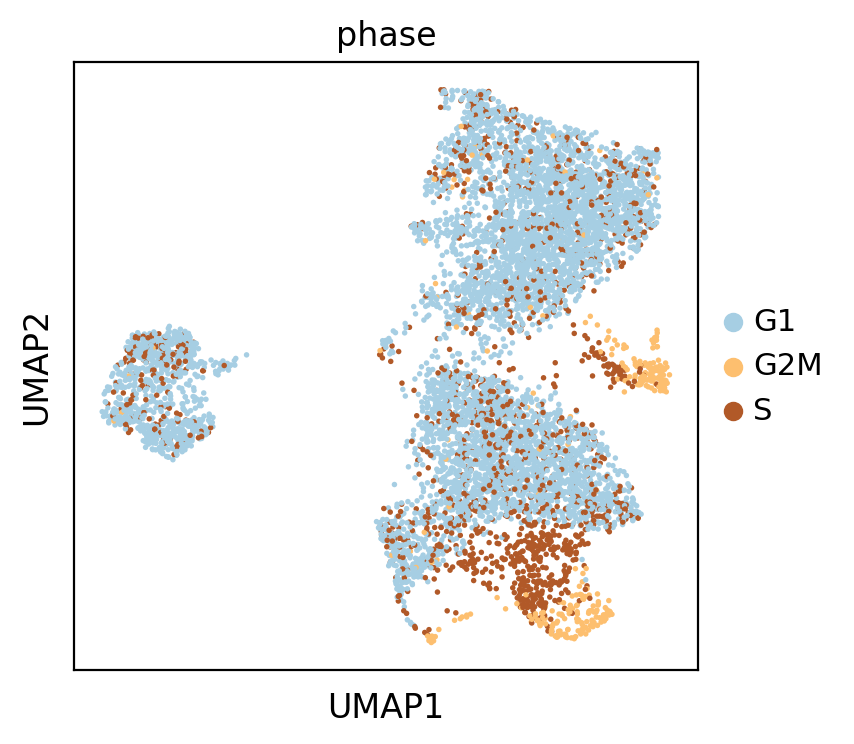

In [13]:
sc.pl.umap(adataAll, color='phase', palette = "Paired",save="Figure_S1I.pdf" )

In [ ]:
f, ax = plt.subplots(figsize=(4, 4))
sc.pl.umap(adataAll, color='Pred_TC', 
           legend_fontoutline=3, legend_fontsize=14, 
           legend_fontweight='normal', title='Predicted TCs',
           ax=ax, show=False, size=3, save="Figure_S1U.pdf");

In [ ]:
f, ax = plt.subplots(figsize=(4, 4))
sc.pl.umap(adataAll, color='Pred_subCellType', 
           legend_fontoutline=3, legend_fontsize=14, 
           legend_fontweight='normal', title='Predicted sub-cell types',
           ax=ax, show=False, size=10, palette="Accent", save="Figure_S1W.pdf");

In [ ]:
for i in leidenMarkersOfPerturbedCells.group.unique():
     sc.pl.umap(adataAll, color="TC_"+str(i) + "_scores", size=4, color_map="seismic", save="TC_"+str(i))
     #sc.pl.violin(adataAll, "TC_"+str(i)+"_scores", groupby='leiden')

In [14]:
kk = adataAll.obs[["type","Pred_TC","Pred_subCellType"]]

In [15]:
hehe = pd.DataFrame(adata.obs["leiden"].value_counts())
hehe["Pred_TC"] = hehe.index

In [16]:
hehe

,leiden,Pred_TC
0,74260,0
1,57356,1
2,47577,2
3,35943,3
4,9971,4
5,7309,5
6,5766,6
7,4073,7
8,3521,8
9,274,9


R[write to console]: data.table 1.14.6 using 8 threads (see ?getDTthreads).  Latest news: r-datatable.com



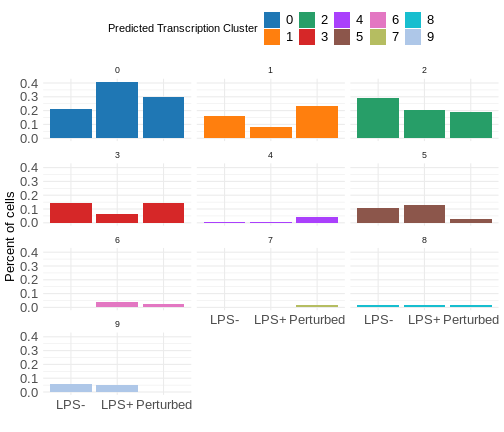

In [17]:
%%R -i kk,hehe -w 7 -h 6 -u in

library("data.table")
library(ggplot2) 

hehe$Perc = hehe$leiden/sum(hehe$leiden)
hehe$type="Perturbed"
hehe=hehe[,c("type", "Pred_TC", "Perc")]

predTCs = data.table(table(kk[,c("type", "Pred_TC")]))
predTCs[,Perc:=(N/sum(N)),by=type]
predTCs = data.frame(predTCs)
predTCs[predTCs$type == "LPSMinus","type"] = "LPS-"
predTCs[predTCs$type == "LPSPlus","type"] = "LPS+"
predTCs$N=NULL

predTCs = rbind(predTCs, hehe)

head(predTCs)

#pdf(file="Figure_S1V.pdf", width=40, height=20)

ggplot(data=predTCs, 
       aes(x=type, y=Perc, fill=Pred_TC)) + theme_minimal()+
       facet_wrap(~Pred_TC,ncol=3 )+
       geom_bar(stat="identity")+
       scale_fill_manual(name = "Predicted Transcription Cluster", 
                         values=c('#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', 
                                                       '#8c564b','#e377c2', '#b5bd61', '#17becf', '#aec7e8' ))+
       ylab("Percent of cells") + xlab("") +
      theme(axis.text = element_text(size=13), axis.title = element_text(size=13), 
      legend.text=element_text(size=13), legend.title=element_text(size=11), legend.pos="top")

#dev.off()
#  
# library(reshape2) 
# 
# library(ggpubr) 

# ldMelted = melt(leidenScores, id.vars="type")
# 

# ggplot(ldMelted, aes(x=type, y=value)) + 
#      geom_violin(trim=FALSE, aes(fill=type))+
#      geom_boxplot()+theme_minimal()+ 
#      facet_wrap(.~variable, ncol=5)+
#      #stat_summary(fun.data = mean, geom = "text", size=6)+
#         stat_compare_means(method="wilcox.test",paired = FALSE,
#                                 comparisons = list(c("LPSMinus", "LPSPlus")),
#                                 color="red", method.args = list(alternative = "less"),
#                                 label.y = c(3), aes(label = ..p.signif..))+
#      scale_fill_brewer(palette = "Pastel1")+
# ylab("Cell score")+
# theme(axis.text = element_text(size=15),strip.text=element_text(size=12),
#               axis.title =  element_text(size=16))+ylim(0,5) +xlab("") 

In [18]:
hehe = pd.DataFrame(adata.obs["subCellType"].value_counts())
hehe["Pred_subCellType"] = hehe.index
hehe

,subCellType,Pred_subCellType
DC2,199277,DC2
MacDC,35943,MacDC
MReg,7309,MReg
DC1,3521,DC1


In [19]:
%%R -i kk,hehe -w 9 -h 4 -u in

predTCs = data.table(table(kk[,c("type", "Pred_subCellType")]))
predTCs[,Perc:=(N/sum(N)),by=type]
predTCs = data.frame(predTCs)
predTCs


      type Pred_subCellType    N        Perc
1 LPSMinus              DC1   36 0.009849521
2  LPSPlus              DC1   35 0.008691333
3 LPSMinus              DC2 2734 0.748016416
4  LPSPlus              DC2 3310 0.821951825
5 LPSMinus             MReg  382 0.104514364
6  LPSPlus             MReg  531 0.131859945
7 LPSMinus            MacDC  503 0.137619699
8  LPSPlus            MacDC  151 0.037496896


In [20]:
%%R 

#MacDC lower in unperturbed LPS stimulated cells than in either unperturbed unstimulated DCs or perturbed stimulated DCs 

##test perturbed stimulated DCs
# myDF = data.frame(LPS_plus = c(151, (35+3310+531)),
#                   pert = c(35943, (199277 + 7309 + 3521)))
                  
# myDF
# fisher.test(x= myDF, alternative="less")

# ##test unperturbed unstimulated DCs
# myDF = data.frame(LPS_plus = c(151, (35+3310+531)),
#                   LPS_minus = c(503, (36+2734+382)))
                  
# myDF
# fisher.test(x= myDF, alternative="less")


## mDCs in unperturbed cells (stimulated and unstimulated) higher than in perturbed stimulated DCs 
## test unperturbed stimulated
# myDF = data.frame(LPS_plus = c(531, (35+3310+151)),
#                   pert = c(7309, (199277+35943+3521)))
                  
# myDF
# fisher.test(x= myDF, alternative="greater")

## test unperturbed unstimulated
myDF = data.frame(LPS_minus = c(382, (36+2734+503)),
                  pert = c(7309, (199277+35943+3521)))
                  
myDF
fisher.test(x= myDF, alternative="greater")


	Fisher's Exact Test for Count Data

data:  myDF
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 3.4729    Inf
sample estimates:
odds ratio 
  3.812464 



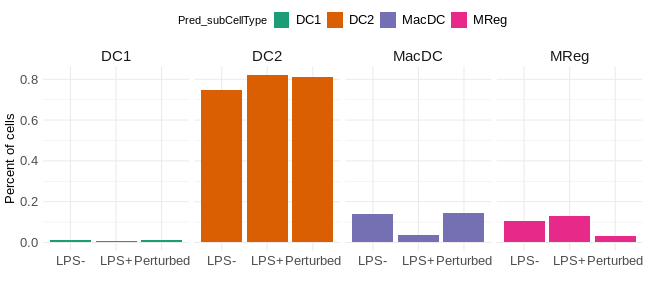

In [21]:
%%R -i kk,hehe -w 9 -h 4 -u in

library("data.table")
library(ggplot2) 

head(hehe)
hehe$Perc = hehe$subCellType/sum(hehe$subCellType)
hehe$type="Perturbed"
hehe=hehe[,c("type", "Pred_subCellType", "Perc")]


predTCs = data.table(table(kk[,c("type", "Pred_subCellType")]))
predTCs[,Perc:=(N/sum(N)),by=type]
predTCs = data.frame(predTCs)
predTCs[predTCs$type == "LPSMinus","type"] = "LPS-"
predTCs[predTCs$type == "LPSPlus","type"] = "LPS+"
predTCs$N = NULL

head(predTCs)

predTCs = rbind(predTCs, hehe)


options(repr.plot.width=3, repr.plot.height=2)
ggplot(data=predTCs, 
       aes(x=type, y=Perc, fill=Pred_subCellType)) + theme_minimal()+
       facet_wrap(~Pred_subCellType,ncol=4 )+
       geom_bar(stat="identity")+ scale_fill_brewer(palette="Dark2")+
       ylab("Percent of cells") + xlab("") +
      theme(axis.text = element_text(size=13), axis.title = element_text(size=13), 
            strip.text = element_text(size=15), 
      legend.text=element_text(size=13), legend.title=element_text(size=11), legend.pos="top")



In [22]:
allDCgenes = np.concatenate((dc1Genes, dc2Genes, mregGenes))
sc.tl.score_genes(adata=adataAll, gene_list=allDCgenes, score_name="DCSig")

computing score 'DCSig'
    finished: added
    'DCSig', score of gene set (adata.obs).
    1071 total control genes are used. (0:00:00)


/home/eraslab1/miniconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


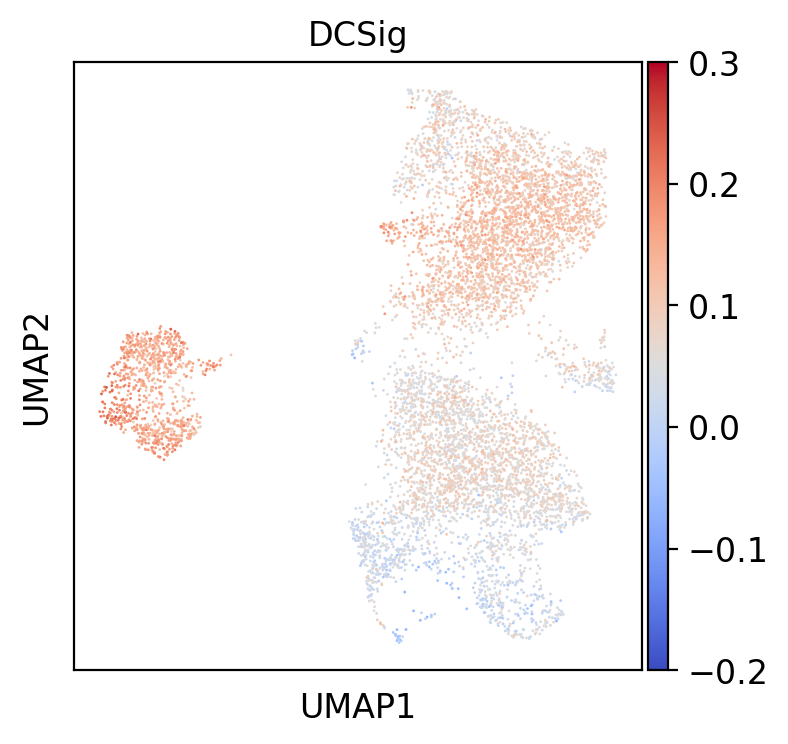

In [23]:
sc.pl.umap(adataAll, color="DCSig", size=4, color_map="coolwarm", vmin=-0.2, vmax=0.3)

In [24]:
adataAll.obs["DCSig_zscore"] = scipy.stats.zscore(adataAll.obs["DCSig"])
adataAll.obs["Mac_zscore"] = scipy.stats.zscore(adataAll.obs["Mac"])

In [25]:
adataAll.obs["MACoverDC"] = adataAll.obs["Mac_zscore"] - adataAll.obs["DCSig_zscore"]

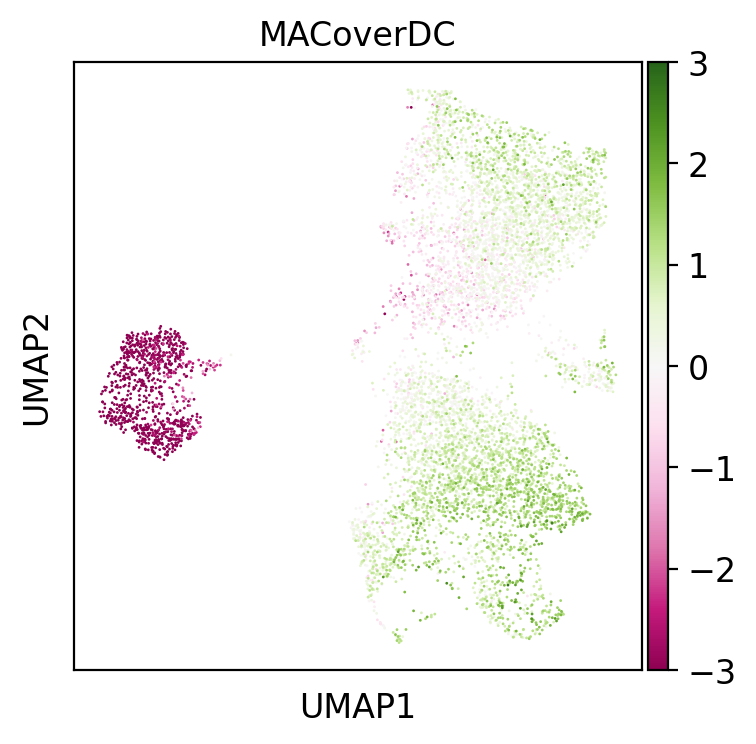

In [26]:
sc.pl.umap(adataAll, color="MACoverDC", size=4, color_map="PiYG", vmin=-3, vmax=3)


In [27]:
leidenScores = adataAll.obs[["TC_"+str(x)+"_scores" for x in range(0,10)]+["type"]]

In [28]:
leidenScores

,TC_0_scores,TC_1_scores,TC_2_scores,TC_3_scores,TC_4_scores,TC_5_scores,TC_6_scores,TC_7_scores,TC_8_scores,TC_9_scores,type
AAACCCACAGAGTGAC-1,0.689409,0.286582,1.242580,-0.012966,0.408492,0.787708,-0.015277,0.250058,1.884940,0.031990,LPSMinus
AAACCCAGTATTTCGG-1,-0.364617,0.116596,0.393442,0.133840,0.206097,2.362178,-0.012922,-0.229572,2.654195,0.033241,LPSMinus
AAACCCATCCATAAGC-1,0.697802,0.728527,0.487824,0.098639,0.344504,0.589780,-0.107917,0.292052,1.504082,0.211063,LPSMinus
AAACGAAAGATCCAAA-1,0.666974,1.052527,0.474437,0.006341,0.593879,0.565359,-0.168798,-0.088710,1.229310,0.130878,LPSMinus
AAACGAACATAGGCGA-1,0.287318,0.199514,1.533162,0.046320,0.200000,0.876879,-0.222338,0.253510,2.001499,-0.020894,LPSMinus
...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGGTGCATTTG-1,0.756272,0.901489,0.743437,0.001202,0.496114,0.475399,-0.188006,0.208332,1.273681,0.187646,LPSPlus
TTTGGTTGTGCATTTG-1,1.036462,0.620148,0.910002,0.023979,0.493227,0.765555,-0.117311,0.372726,1.841558,0.131500,LPSPlus
TTTGGTTTCCCTGTTG-1,0.529674,0.275871,1.645851,0.014337,0.392863,0.795617,-0.103727,0.373109,1.713317,0.183329,LPSPlus
TTTGGTTTCGCCAACG-1,0.810756,0.516992,0.970645,-0.000311,0.366780,0.632721,-0.044874,0.486500,1.715013,0.181512,LPSPlus


R[write to console]: 
Attaching package: ‘reshape2’


R[write to console]: The following objects are masked from ‘package:data.table’:

    dcast, melt




[1] TRUE


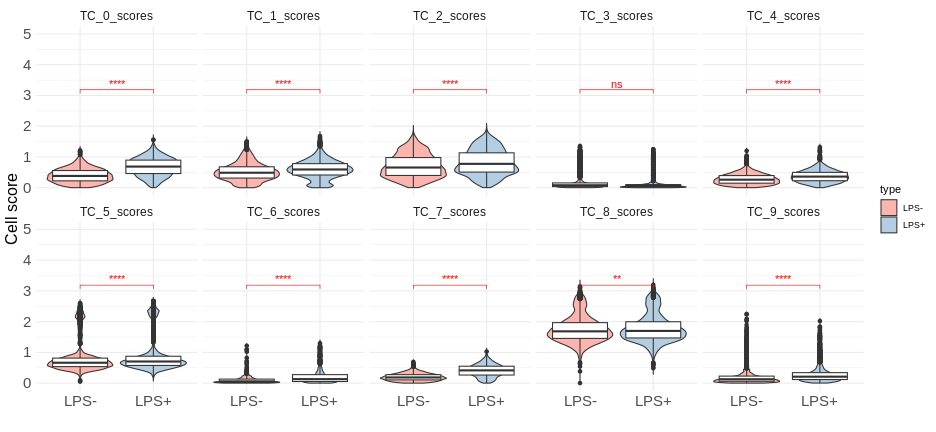

In [29]:
%%R -i leidenScores -w 13 -h 6 -u in

library(MASS) 
library(reshape2) 
library(ggplot2) 
library(ggpubr) 

leidenScores$type = as.character(leidenScores$type)

leidenScores[leidenScores$type == "LPSMinus","type"] = "LPS-"
leidenScores[leidenScores$type == "LPSPlus","type"] = "LPS+"
head(leidenScores)

ldMelted = melt(leidenScores, id.vars="type")
options(repr.plot.width=6, repr.plot.height=4)

ggplot(ldMelted, aes(x=type, y=value)) + 
     geom_violin(trim=FALSE, aes(fill=type))+
     geom_boxplot()+theme_minimal()+ 
     facet_wrap(.~variable, ncol=5)+
     #stat_summary(fun.data = mean, geom = "text", size=6)+
        stat_compare_means(method="wilcox.test",paired = FALSE,
                                comparisons = list(c("LPS-", "LPS+")),
                                color="red", method.args = list(alternative = "less"),
                                label.y = c(3), aes(label = ..p.signif..))+
     scale_fill_brewer(palette = "Pastel1")+
ylab("Cell score")+
theme(axis.text = element_text(size=15),strip.text=element_text(size=12),
              axis.title =  element_text(size=16))+ylim(0,5) +xlab("") 

In [30]:
adataAll.obs.shape

(7682, 40)

In [31]:
%%R -i cellScoresOfStates -w 13 -h 6 -u in

cellScorMelted = melt(cellScoresOfStates)
head(cellScorMelted)
#options(repr.plot.width=6, repr.plot.height=4)

ggplot(cellScorMelted, aes(x=variable, y=value)) + 
     geom_violin(trim=FALSE, aes(fill=variable))+
     geom_boxplot()+theme_minimal()
        

#      facet_wrap(.~variable, ncol=5)+
#     stat_summary(fun.data = mean, geom = "text", size=6)
#         stat_compare_means(method="wilcox.test",paired = FALSE,
#                                 comparisons = list(c("LPSMinus", "LPSPlus")),
#                                 color="red", method.args = list(alternative = "less"),
#                                 label.y = c(3), aes(label = ..p.signif..))+
#      scale_fill_brewer(palette = "Pastel1")+
# ylab("Cell score")+
# theme(axis.text = element_text(size=15),strip.text=element_text(size=12),
#               axis.title =  element_text(size=16))+ylim(0,5) +xlab("") 

NameError: name 'cellScoresOfStates' is not defined.

In [ ]:
markerGenes = pd.DataFrame(adataAll.uns['rank_genes_groups']['names'])
markerGenes = markerGenes.iloc[0:10,:]
markerGenes = np.unique(markerGenes.values.flatten())

In [ ]:
sc.tl.rank_genes_groups(adataAll, 'leiden', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups_heatmap(adataAll, n_genes=15,key="t-test_ov", groupby="leiden", show_gene_labels=True, vmax=5)
sc.pl.rank_genes_groups_dotplot(adataAll, n_genes=10, key="t-test_ov", groupby="leiden")
sc.pl.rank_genes_groups_matrixplot(adataAll, n_genes=10, key="t-test_ov", groupby="leiden")


In [ ]:
# sc.pl.matrixplot(adataAll, markerGenes, groupby='leiden', dendrogram=True,
#                       use_raw=False, vmin=-3, vmax=3,cmap='bwr',  swap_axes=True, figsize=(10,14))

In [ ]:
# sc.pl.heatmap(adataAll, markerGenes, groupby='leiden', figsize=(20, 10),
#               use_raw=False, vmin=-3, vmax=3, cmap='bwr', show_gene_labels=True, dendrogram=True, swap_axes=False)

In [ ]:
sc.tl.rank_genes_groups(adataAll, 'type', method='t-test_overestim_var')


In [ ]:
DEgenes = sc.get.rank_genes_groups_df(adataAll, group='LPSPlus')

In [ ]:
DEgenes = DEgenes.loc[DEgenes.pvals_adj < 0.05,:]

In [ ]:
DEgenes.loc[np.abs(DEgenes.logfoldchanges) > 0.5,:]

In [ ]:
DEgenes = DEgenes.loc[np.abs(DEgenes.logfoldchanges) > 0.5,:]

In [ ]:
DEgenes[["TestCondition"]] = "LPSPlusOverMinus"

In [ ]:
DEgenes.shape

In [ ]:
DEgenes.to_csv("LPSPlusOverMinusDEGenes.csv", index=False)

In [ ]:
pd.DataFrame({"GeneNames":adataAll.uns['rank_genes_groups']['names'],
              "logFC":adataAll.uns['rank_genes_groups']['logfoldchanges'],
              "pValAdj":adataAll.uns['rank_genes_groups']['pvals_adj']})


In [ ]:
result = adataAll.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']})


In [ ]:
genes1 = sc.get.rank_genes_groups_df(adataAll, group='LPSPlus')['names']

In [ ]:
sc.pl.rank_genes_groups_dotplot(adataAll, n_genes=100, groupby="type")
